In [690]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


import warnings
warnings.filterwarnings('ignore')

# Load Data

In [691]:
path = "data.xlsx"
df = pd.read_excel(path)

In [692]:
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,1.150000e+01,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,1.434500e+04,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000e+00,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,1.414286e+16,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,1.350000e+01,0,8.9,1.4,3.51,Dropout


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [694]:
df.rename(columns = {'Nacionality':'Nationality', 'Age_at_enrollment':'Age'}, inplace = True)

In [695]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age                                             0


In [696]:
df.shape

(4424, 37)

In [697]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571e+00,6.057469e-01,1.00,1.00,1.00,1.000000e+00,6.000000e+00
Application_mode,4424.0,1.866908e+01,1.748468e+01,1.00,1.00,17.00,3.900000e+01,5.700000e+01
Application_order,4424.0,1.727848e+00,1.313793e+00,0.00,1.00,1.00,2.000000e+00,9.000000e+00
Course,4424.0,8.856643e+03,2.063566e+03,33.00,9085.00,9238.00,9.556000e+03,9.991000e+03
Daytime_evening_attendance,4424.0,8.908228e-01,3.118967e-01,0.00,1.00,1.00,1.000000e+00,1.000000e+00
Previous_qualification,4424.0,4.577758e+00,1.021659e+01,1.00,1.00,1.00,1.000000e+00,4.300000e+01
Previous_qualification_grade,4424.0,1.326133e+02,1.318833e+01,95.00,125.00,133.10,1.400000e+02,1.900000e+02
Nationality,4424.0,1.873192e+00,6.914514e+00,1.00,1.00,1.00,1.000000e+00,1.090000e+02
Mothers_qualification,4424.0,1.956193e+01,1.560319e+01,1.00,2.00,19.00,3.700000e+01,4.400000e+01
Fathers_qualification,4424.0,2.227532e+01,1.534311e+01,1.00,3.00,19.00,3.700000e+01,4.400000e+01


# Preprocessing

In [698]:
print(df["Status"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [699]:
df['Status'] = df['Status'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [700]:
print(df["Status"].unique())

[0 2 1]


In [701]:
df.corr()['Status']

Marital_status                                 -0.089804
Application_mode                               -0.221747
Application_order                               0.089791
Course                                          0.034219
Daytime_evening_attendance                      0.075107
Previous_qualification                         -0.056039
Previous_qualification_grade                    0.103764
Nationality                                    -0.014801
Mothers_qualification                          -0.043178
Fathers_qualification                          -0.001393
Mothers_occupation                             -0.005629
Fathers_occupation                             -0.001899
Admission_grade                                 0.120889
Displaced                                       0.113986
Educational_special_needs                      -0.007353
Debtor                                         -0.240999
Tuition_fees_up_to_date                         0.409827
Gender                         

In [702]:
sorted_corr = df.corr()['Status'].sort_values(ascending=False)
sorted_corr

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_1st_sem_approved               0.529123
Tuition_fees_up_to_date                         0.409827
Curricular_units_1st_sem_grade                  0.311004
Curricular_units_2nd_sem_grade                  0.307311
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evalua

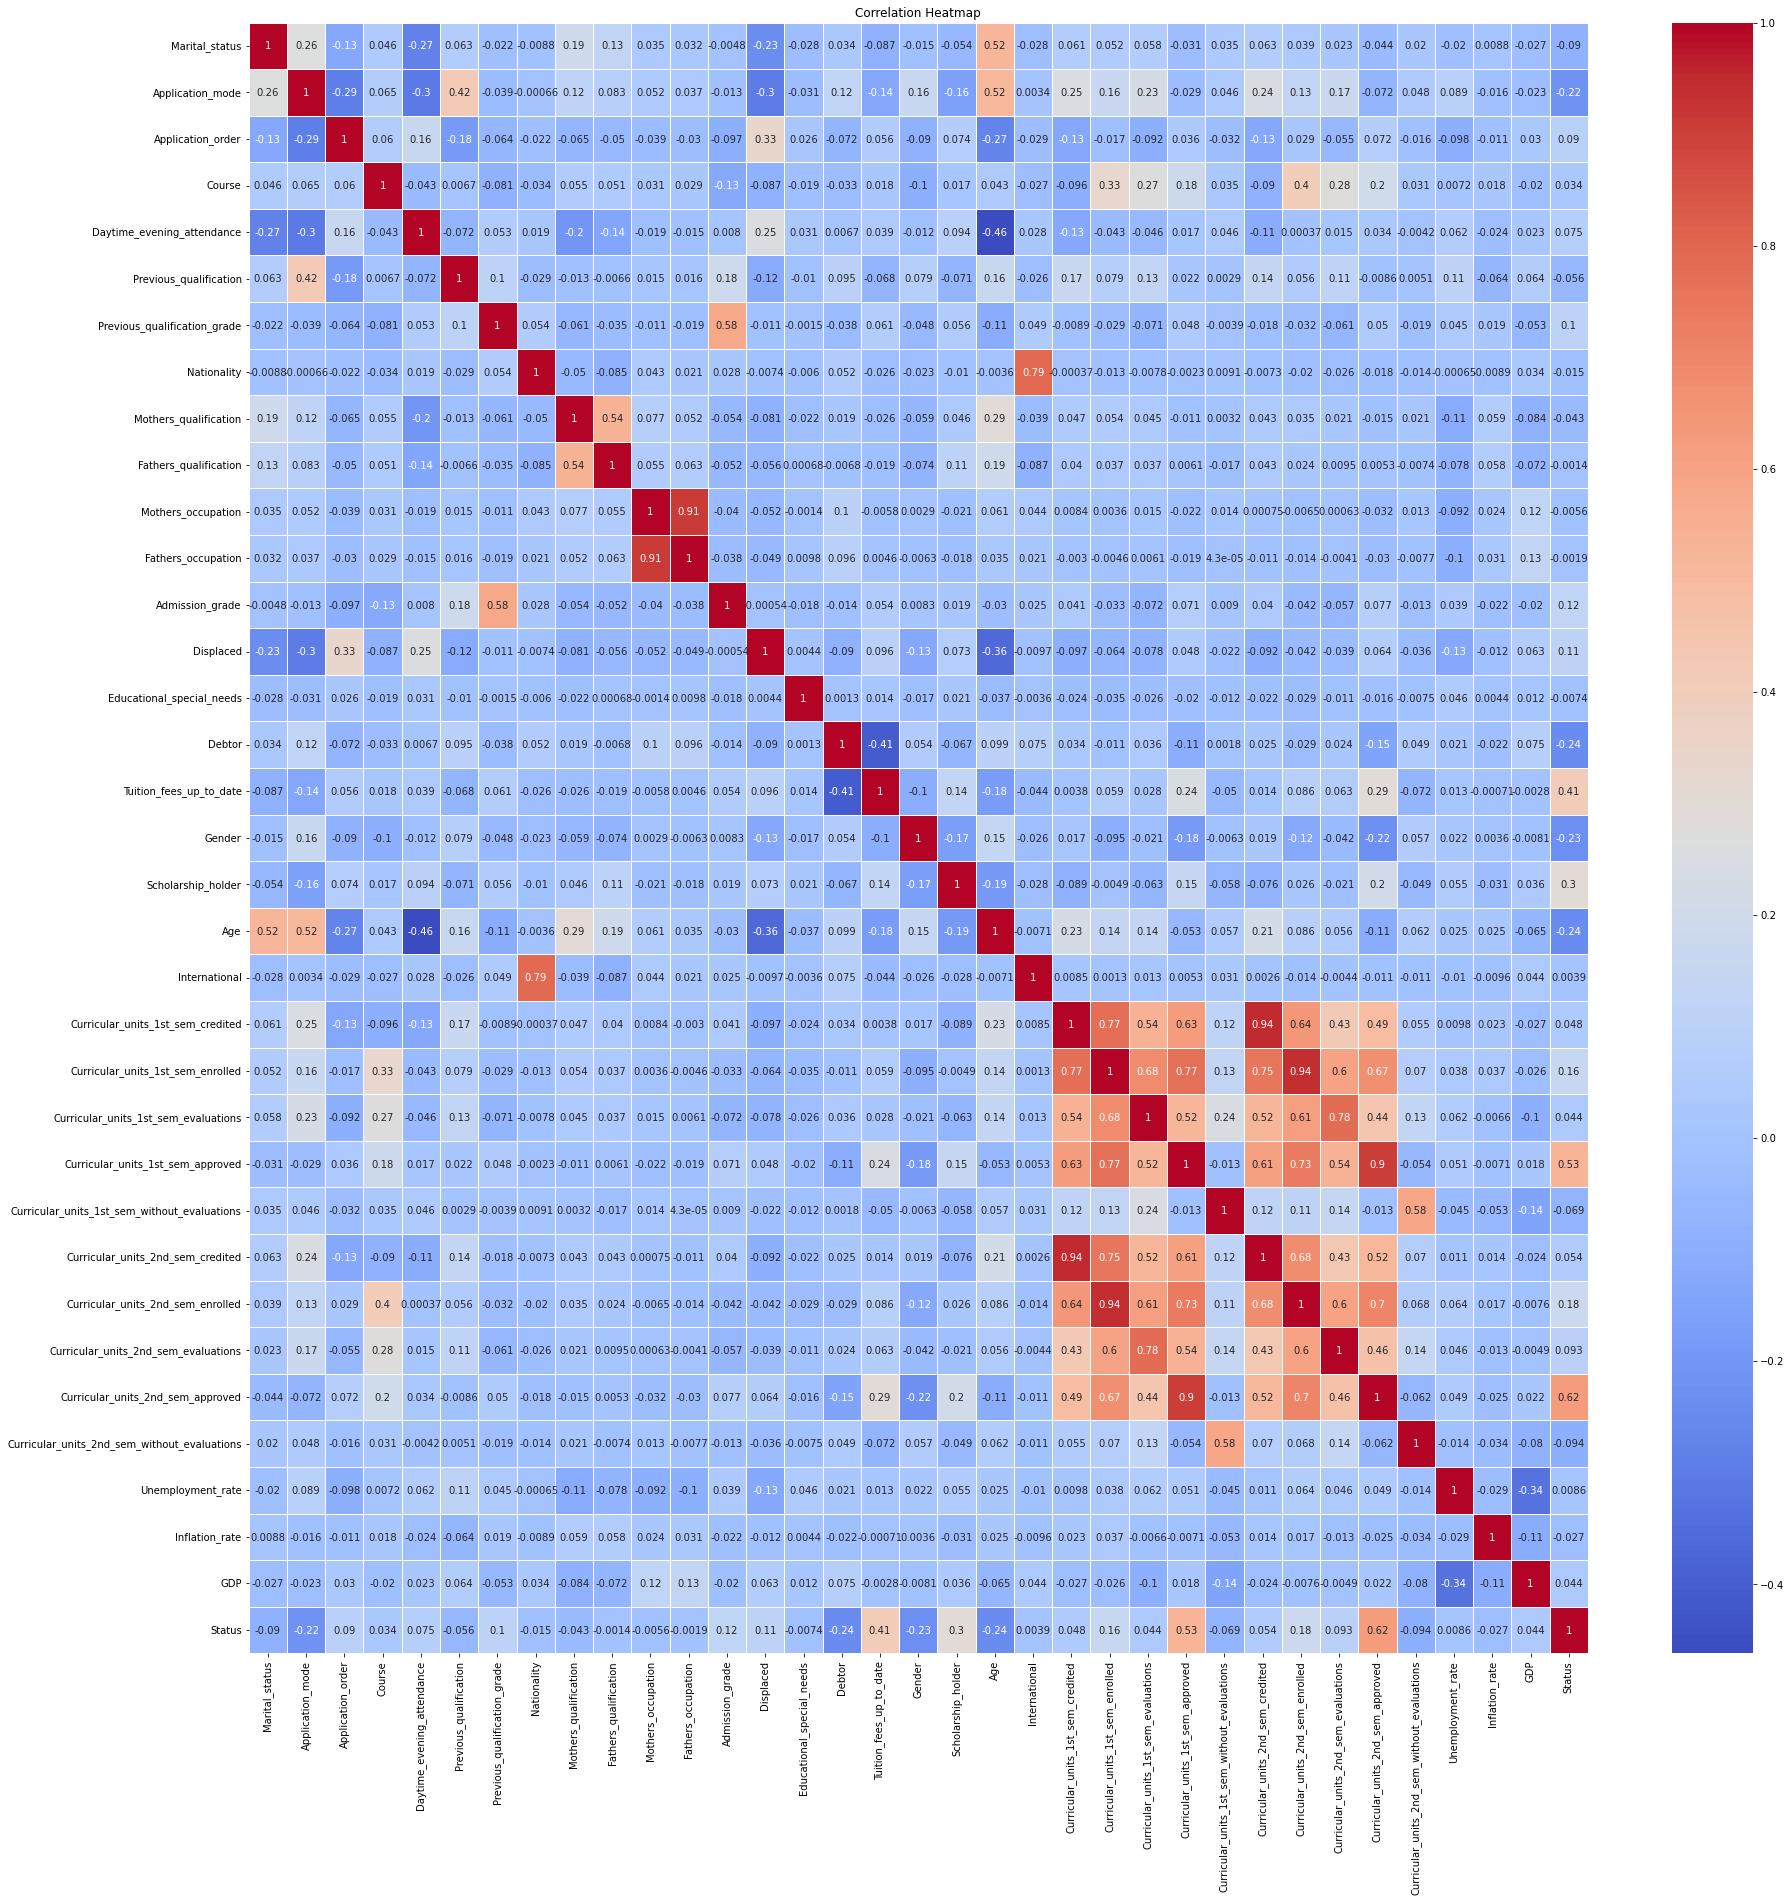

In [677]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [703]:
new_df = df.copy()
new_df = new_df.drop(columns=['Nationality', 
                                  'Mothers_qualification', 
                                  'Fathers_qualification', 
                                  'Educational_special_needs', 
                                  'International', 
                                  'Curricular_units_1st_sem_without_evaluations',
                                  'Unemployment_rate', 
                                  'Inflation_rate'], axis=1)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Mothers_occupation                            4424 non-null   int64  
 8   Fathers_occupation                            4424 non-null   int64  
 9   Admission_grade                               4424 non-null   f

In [704]:
new_df.shape

(4424, 29)

# EDA

In [705]:
#melihat jumlah masing-masing status
new_df['Status'].value_counts()

2    2209
0    1421
1     794
Name: Status, dtype: int64

In [706]:
x = new_df['Status'].value_counts().index
y = new_df['Status'].value_counts().values

df = pd.DataFrame({
    'Status': x,
    'Jumlah' : y
})

fig = px.pie(df,
             names ='Status', 
             values ='Jumlah',
            title='Jumlah Dropout, Graduate, dan Enrolled Terhadap Atribut Status')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

### Karena kita akan memprediksi apakah siswa dropout atau tidak, maka data enrolled tidak relevan digunakan

In [707]:
new_df.drop(new_df[new_df['Status'] == 1].index, inplace = True)
new_df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,GDP,Status
0,1,17,5,171,1,1,122.0,5,9,127.3,...,0,0.000000e+00,0,0,0,0,0.000000e+00,0,1.74,0
1,1,15,1,9254,1,1,160.0,3,3,142.5,...,6,1.400000e+01,0,6,6,6,1.366667e+16,0,0.79,2
2,1,1,5,9070,1,1,122.0,9,9,124.8,...,0,0.000000e+00,0,6,0,0,0.000000e+00,0,1.74,0
3,1,17,2,9773,1,1,122.0,5,3,119.6,...,6,1.342857e+16,0,6,10,5,1.240000e+01,0,-3.12,2
4,2,39,1,8014,0,1,100.0,9,9,141.5,...,5,1.233333e+16,0,6,6,6,1.300000e+01,0,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,5,4,122.2,...,5,1.360000e+01,0,6,8,5,1.266667e+16,0,-4.06,2
4420,1,1,2,9773,1,1,120.0,9,9,119.0,...,6,1.200000e+01,0,6,6,2,1.100000e+01,0,2.02,0
4421,1,1,1,9500,1,1,154.0,9,9,149.5,...,7,1.491250e+05,0,8,9,1,1.350000e+01,0,0.79,0
4422,1,1,1,9147,1,1,180.0,7,4,153.8,...,5,1.380000e+01,0,5,6,5,1.200000e+01,0,-3.12,2


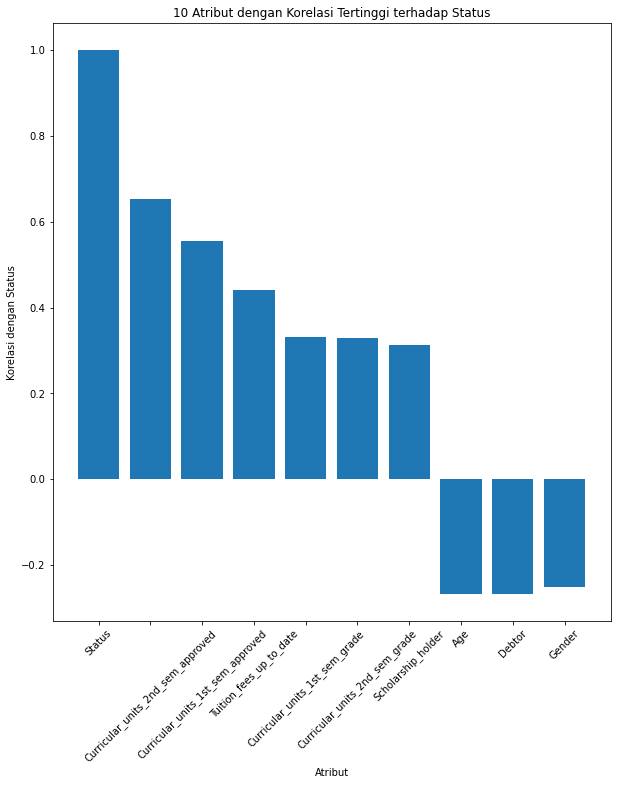

In [708]:
#memeriksa 10 atribut dengan korelasi tertinggi terhadap atribut status
correlations = new_df.corr()['Status']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Atribut')
plt.ylabel('Korelasi dengan Status')
plt.title('10 Atribut dengan Korelasi Tertinggi terhadap Status')
plt.xticks(rotation=45)
plt.show()

In [709]:
#Distribusi usia siswa pada saat pendaftaran
px.histogram(new_df['Age'], x='Age',color_discrete_sequence=['lightblue'])

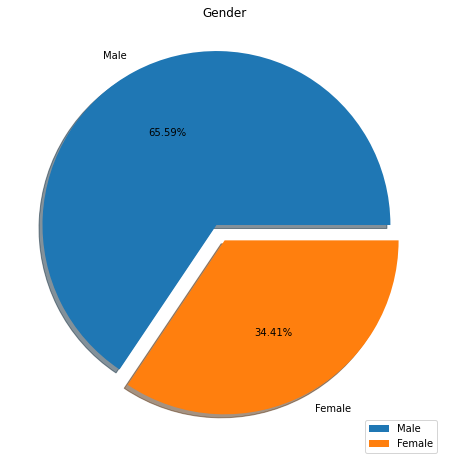

In [710]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(new_df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

## Memeriksa outlier

In [711]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(new_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   0,    5,    5, ..., 3624, 3625, 3628], dtype=int64),
 array([ 3, 15, 26, ...,  5,  2,  6], dtype=int64))

In [712]:
# Dropping the corresponding rows from the dataframe
new_df = new_df.drop(new_df.index[outliers[0]])

# Resetting the index of the dataframe
new_df = new_df.reset_index(drop=True)
new_df.shape
new_df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,GDP,Status
0,1,15,1,9254,1,1,160.0,3,3,142.5,...,6,1.400000e+01,0,6,6,6,1.366667e+16,0,0.79,2
1,1,1,5,9070,1,1,122.0,9,9,124.8,...,0,0.000000e+00,0,6,0,0,0.000000e+00,0,1.74,0
2,1,17,2,9773,1,1,122.0,5,3,119.6,...,6,1.342857e+16,0,6,10,5,1.240000e+01,0,-3.12,2
3,2,39,1,8014,0,1,100.0,9,9,141.5,...,5,1.233333e+16,0,6,6,6,1.300000e+01,0,0.79,2
4,1,1,1,9500,1,1,142.0,7,10,128.4,...,7,1.330000e+01,0,8,8,8,1.434500e+04,0,-4.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,1,1,1,9130,1,1,137.0,3,5,129.3,...,5,1.180000e+01,0,5,8,5,1.160000e+01,0,-3.12,2
2626,1,1,1,9070,1,1,132.0,9,9,133.8,...,6,1.383333e+16,0,6,6,6,1.350000e+01,0,-0.92,2
2627,1,1,2,9773,1,1,120.0,9,9,119.0,...,6,1.200000e+01,0,6,6,2,1.100000e+01,0,2.02,0
2628,1,1,1,9500,1,1,154.0,9,9,149.5,...,7,1.491250e+05,0,8,9,1,1.350000e+01,0,0.79,0


# Transformation (Scaling)

In [713]:
x = new_df.drop(columns=['Status'], axis=1)
y = new_df["Status"]

In [714]:
x = StandardScaler().fit_transform(x)
x

array([[-0.30439193, -0.04042503, -0.61860869, ...,  1.51639262,
        -0.17625785,  0.36335999],
       [-0.30439193, -0.91598366,  2.83928898, ..., -0.69564711,
        -0.17625785,  0.78615494],
       [-0.30439193,  0.08465477,  0.24586573, ..., -0.69564711,
        -0.17625785, -1.37677504],
       ...,
       [-0.30439193, -0.91598366,  0.24586573, ..., -0.69564711,
        -0.17625785,  0.91076819],
       [-0.30439193, -0.91598366, -0.61860869, ..., -0.69564711,
        -0.17625785,  0.36335999],
       [-0.30439193, -0.35312454, -0.61860869, ..., -0.69564711,
        -0.17625785, -0.74480784]])

# Train & Test Splitting the Data

In [715]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Model

<p> Pada modeling, dilakukan percobaan untuk beberapa algoritma klasifikasi diantaranya adalah naive bayes, logistic regression, random forest, XGBoost, SVM, dan Multi-Layer Perceptron

## Function to Measure Performance

In [716]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

# Naive Bayes

In [717]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [718]:
y_pred_nb = model_nb.predict(x_test)

Precision :  0.8783269961977186
Recall :  0.8783269961977186
Accuracy :  0.8783269961977186
F1 Score :  0.8783269961977186

 [[161  31]
 [ 33 301]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       192
           2       0.91      0.90      0.90       334

    accuracy                           0.88       526
   macro avg       0.87      0.87      0.87       526
weighted avg       0.88      0.88      0.88       526

******************************************************



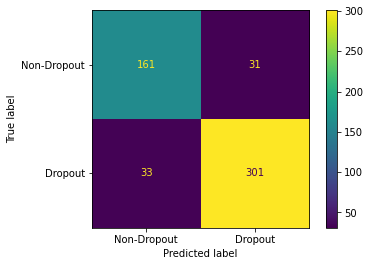

In [719]:
perform(y_pred_nb)

## Logistic Regression

In [720]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [721]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9334600760456274
Recall :  0.9334600760456274
Accuracy :  0.9334600760456274
F1 Score :  0.9334600760456274

 [[166  26]
 [  9 325]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       192
           2       0.93      0.97      0.95       334

    accuracy                           0.93       526
   macro avg       0.94      0.92      0.93       526
weighted avg       0.93      0.93      0.93       526

******************************************************



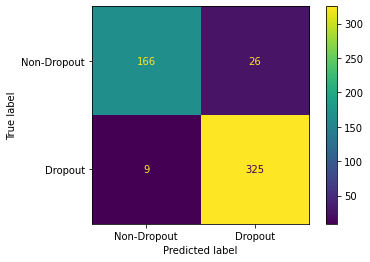

In [722]:
perform(y_pred_lr)

## Random Forest

In [723]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [724]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9334600760456274
Recall :  0.9334600760456274
Accuracy :  0.9334600760456274
F1 Score :  0.9334600760456274

 [[163  29]
 [  6 328]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       192
           2       0.92      0.98      0.95       334

    accuracy                           0.93       526
   macro avg       0.94      0.92      0.93       526
weighted avg       0.94      0.93      0.93       526

******************************************************



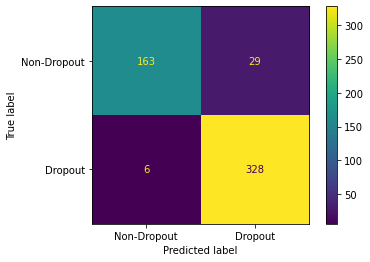

In [725]:
perform(y_pred_rf)

## SVC

In [726]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [727]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.935361216730038
Recall :  0.935361216730038
Accuracy :  0.935361216730038
F1 Score :  0.935361216730038

 [[165  27]
 [  7 327]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       192
           2       0.92      0.98      0.95       334

    accuracy                           0.94       526
   macro avg       0.94      0.92      0.93       526
weighted avg       0.94      0.94      0.93       526

******************************************************



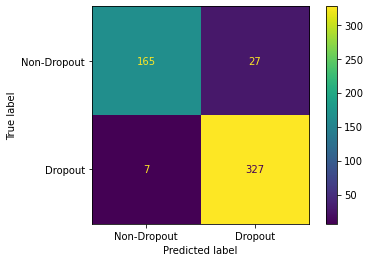

In [728]:
perform(y_pred_svc)

## KNN Classifier


In [729]:
error = []

# Menghitung MAE error untuk nilai K dengan range 1 dan 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    error.append(accuracy)

Text(0, 0.5, 'Accuracy')

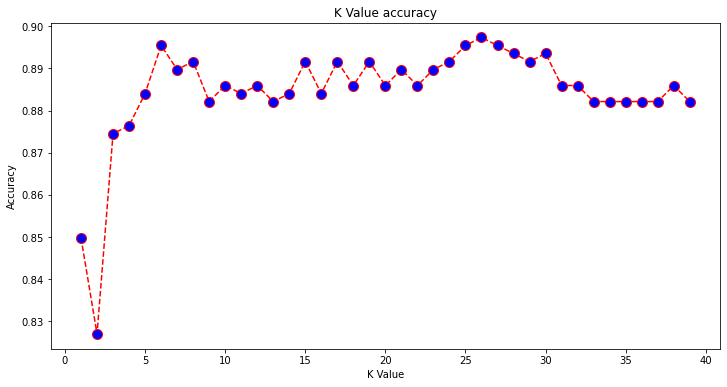

In [730]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [731]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [732]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.8745247148288974
Recall :  0.8745247148288974
Accuracy :  0.8745247148288974
F1 Score :  0.8745247148288974

 [[143  49]
 [ 17 317]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       192
           2       0.87      0.95      0.91       334

    accuracy                           0.87       526
   macro avg       0.88      0.85      0.86       526
weighted avg       0.88      0.87      0.87       526

******************************************************



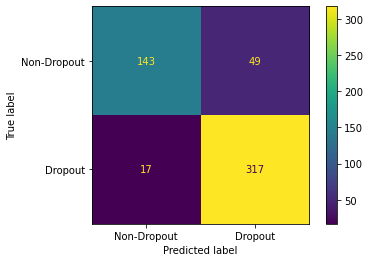

In [733]:
perform(y_pred_knn)

# Perbandingan antar algoritma

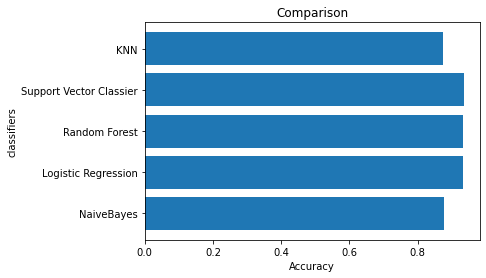

In [739]:
pred=[y_pred_nb,y_pred_lr,y_pred_rf,y_pred_svc,y_pred_knn]
acc=[]
classifiers=["NaiveBayes","Logistic Regression","Random Forest","Support Vector Classier","KNN"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()


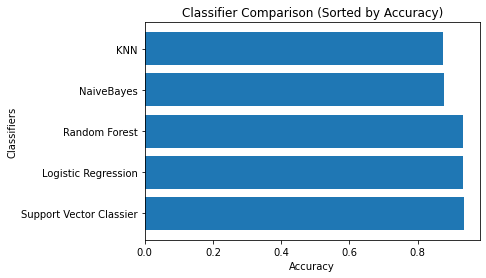

In [740]:
# Daftar prediksi dari classifier
pred = [y_pred_nb, y_pred_lr, y_pred_rf, y_pred_svc, y_pred_knn]
classifiers = ["NaiveBayes", "Logistic Regression", "Random Forest", "Support Vector Classier", "KNN"]

# Inisialisasi daftar akurasi
acc = []

# Menghitung akurasi dan menambahkannya ke daftar akurasi
for i in pred:
    temp = accuracy_score(y_test, i)
    acc.append(temp)

# Menggabungkan classifier dan akurasi dalam satu daftar
classifier_accuracy = list(zip(classifiers, acc))

# Mengurutkan daftar berdasarkan akurasi tertinggi
sorted_classifier_accuracy = sorted(classifier_accuracy, key=lambda x: x[1], reverse=True)

# Membagi daftar kembali ke classifier dan akurasi terurut
sorted_classifiers, sorted_acc = zip(*sorted_classifier_accuracy)

# Membuat plot bar horizontal
plt.barh(sorted_classifiers, sorted_acc)

# Menambahkan label dan judul
plt.ylabel('Classifiers')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison (Sorted by Accuracy)')
plt.show()